In [9]:
# importing numpy and panda library

import numpy as np
import pandas as pd



In [10]:
# obtaining information about the encoding of spam.csv file using chardet  

import chardet

with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(result['encoding'])


Windows-1252


In [11]:
#Reading spam.csv file using pandas 
df = pd.read_csv('spam.csv', encoding='Windows-1252')

In [12]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2397,ham,Neshanth..tel me who r u?,NaN,NaN,NaN
3894,ham,Yes. Last practice,NaN,NaN,NaN
4635,ham,K k pa Had your lunch aha.,NaN,NaN,NaN
639,ham,I had askd u a question some hours before. Its...,NaN,NaN,NaN
1629,ham,Sounds like you have many talents! would you l...,NaN,NaN,NaN


## DATA CLEANING PROCESS

In [14]:
# Checking information about the columns and not null data present in them
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [15]:
## Columns Unnamed: 2,Unnamed: 3,Unnamed: 4 contains missing data and can br dropped 
## Dropping col Unnamed: 2,Unnamed: 3,Unnamed: 4

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)



In [16]:
# checking the structure of table after dropping columns
print(df.sample(5))
df.shape

       v1                                                 v2
3354  ham                      Minimum walk is 3miles a day.
1073  ham  Lul im gettin some juicy gossip at the hospita...
1309  ham            Ok, be careful ! Don't text and drive !
5489  ham        Oh thanks a lot..i already bought 2 eggs ..
3232  ham  Height of recycling: Read twice- People spend ...


(5572, 2)

In [17]:
# Renaming cols of table
df.rename(columns={'v1':'class','v2':'text'},inplace=True)
df.sample(5)

,class,text
2679,spam,"New Tones This week include: 1)McFly-All Ab..,..."
4756,ham,"hey, looks like I was wrong and one of the kap..."
2745,ham,R Ì_ going 4 today's meeting?
556,ham,Having lunch:)you are not in online?why?
1142,ham,Have you had a good day? Mine was really busy ...


In [18]:
# importing labelencoder from sklearn to change the encoding of 'class' column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [19]:
# transforming data of 'class' column
df['class'] = encoder.fit_transform(df['class'])

In [20]:
df.head()

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
# Cheking for null values in table
df.isnull().sum()

class    0
text     0
dtype: int64

In [22]:
# Checking for duplicate values in table
df.duplicated().sum()

403

In [23]:
# Dropping duplicate values
df = df.drop_duplicates(keep='first')

In [24]:
df.duplicated().sum()

0

In [25]:
df.shape

(5169, 2)

## EDA (EXPLORATORY DATA ANALYSIS )

In [27]:
df.head()

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
# checking the percenatges of ham and spam data 
df['class'].value_counts()

class
0    4516
1     653
Name: count, dtype: int64

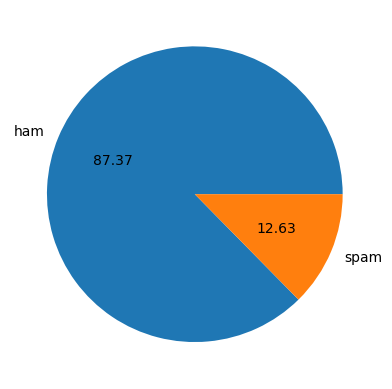

In [29]:
import matplotlib.pyplot as plt
plt.pie(df['class'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [30]:
import nltk

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kamlesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
# Adding a 'num_characters' column which contains number of character in each text
df['num_characters'] = df['text'].apply(len)

In [33]:
df.head()

,class,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
# Adding a 'num_words' column which contains number of words in each text

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [35]:
df.head()

,class,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [36]:
# Adding a 'num_sentences' column which contains number of sentence in each text

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))



In [37]:
df.head()


,class,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
# Decription of 'num_characters','num_words','num_sentences' columns

df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
# Decription of 'num_characters','num_words','num_sentences' columns for class 'ham'
df[df['class'] == 0][['num_characters','num_words','num_sentences']].describe()



,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
# Decription of 'num_characters','num_words','num_sentences' columns for class 'spam'

df[df['class'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [41]:
# plotting histogram of the values obtained


import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

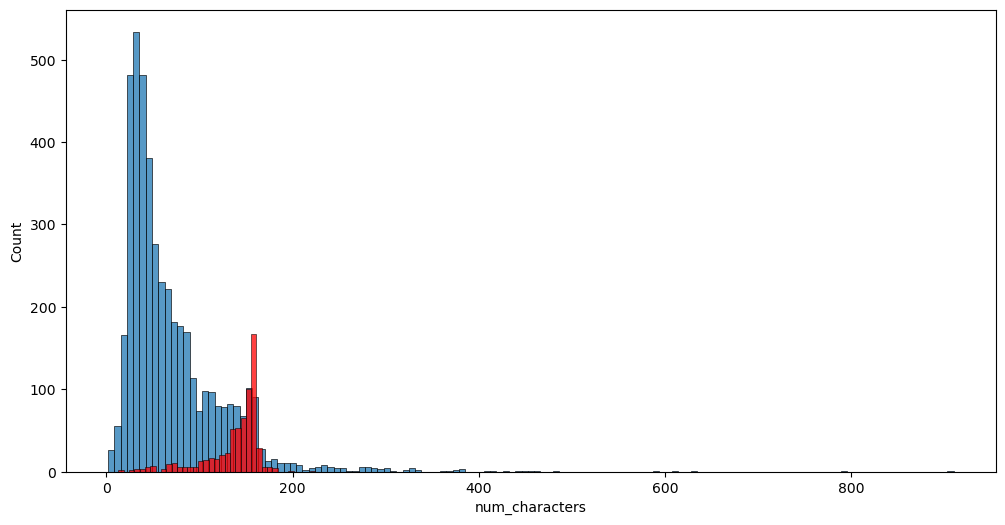

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['class'] == 0]['num_characters'])
sns.histplot(df[df['class'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

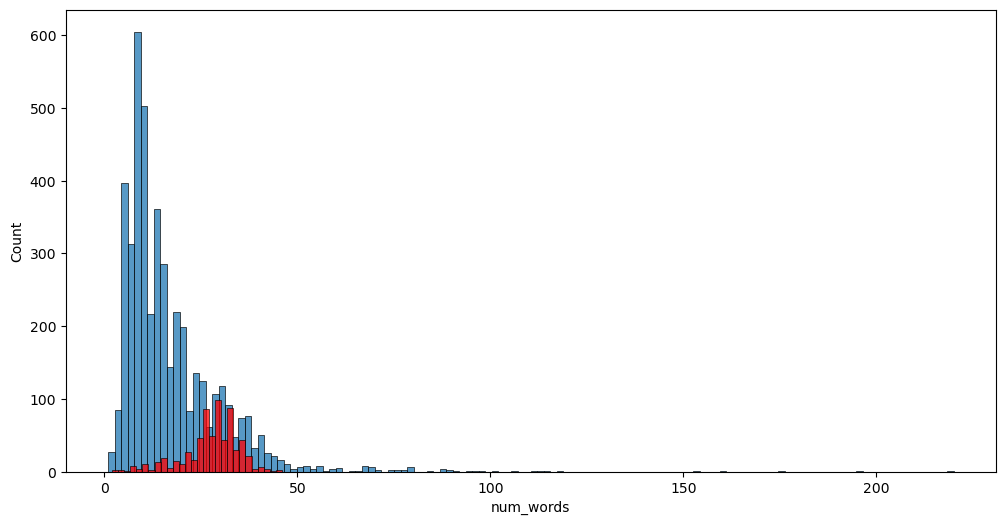

In [43]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['class'] == 0]['num_words'])
sns.histplot(df[df['class'] == 1]['num_words'],color='red')

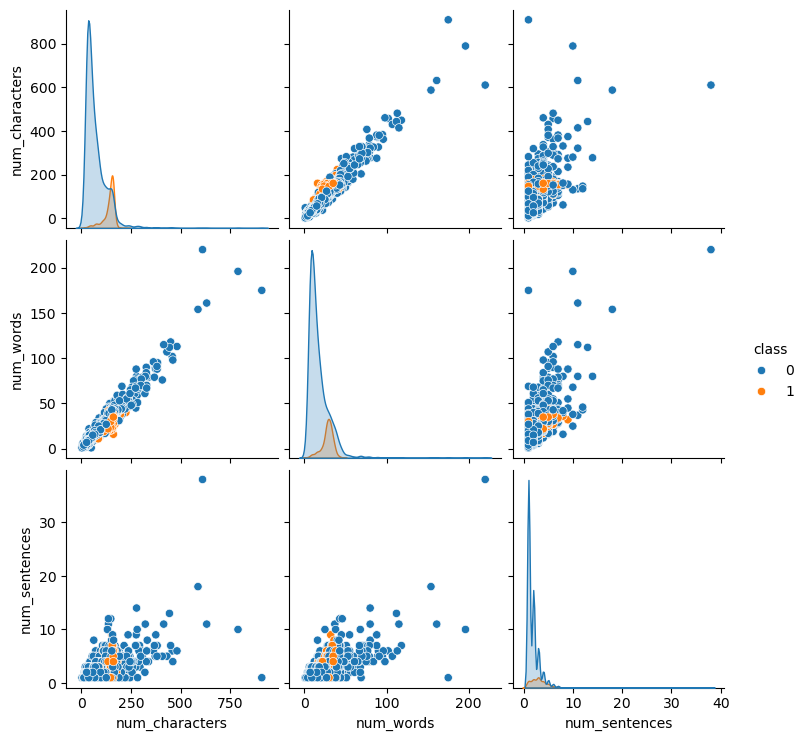

In [44]:
sns.pairplot(df,hue='class')

## DATA PREPROCESSING

In [46]:
# importing stopwords using nltk library
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kamlesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.corpus import stopwords
stopwords.words('english')


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [48]:
# importing string library to get punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
# importing PorterStemmer to perform stemming on text
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()



In [50]:
# function which performs:
# - Lower case
# - Tokenization
# - Removing special characters
# - Removng stop words and punctuation
# - Stemming
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [51]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [52]:
# applying transform_text function on each row of data
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [53]:
# adding transformed text column to datset
df['transformed_text'] = df['text'].apply(transform_text)


In [54]:
df.head()

,class,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [58]:

spam_wc = wc.generate(df[df['class'] == 1]['transformed_text'].str.cat(sep=" "))

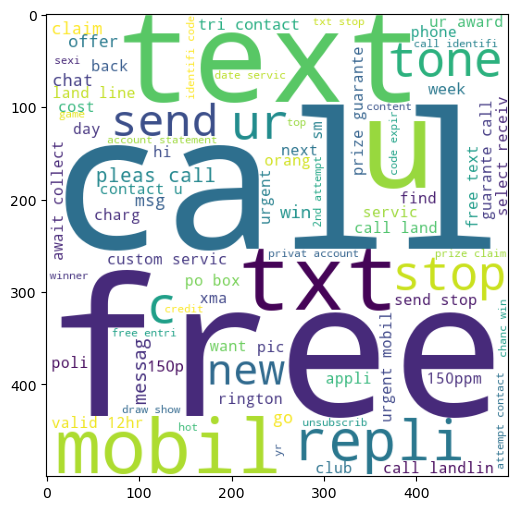

In [60]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [64]:
ham_wc = wc.generate(df[df['class'] == 0]['transformed_text'].str.cat(sep=" "))


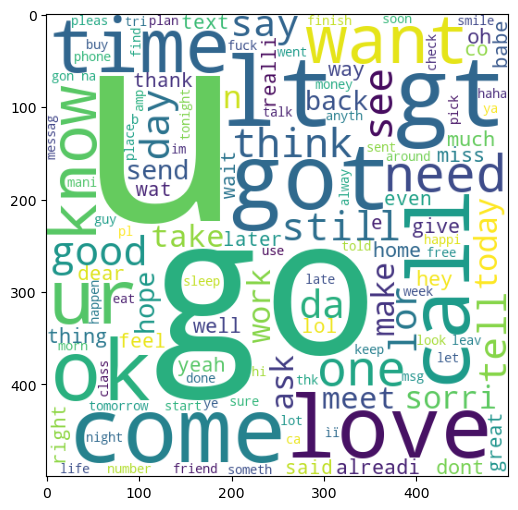

In [66]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [96]:
spam_corpus = []
for msg in df[df['class'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [98]:
len(ham_corpus)


45343

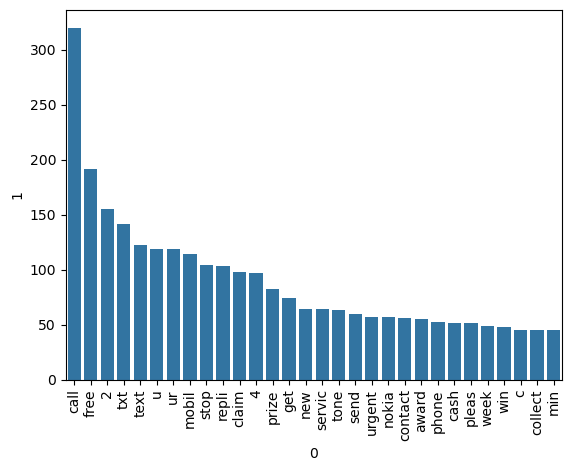

In [100]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [70]:
ham_corpus = []
for msg in df[df['class'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [72]:
len(ham_corpus)


35404

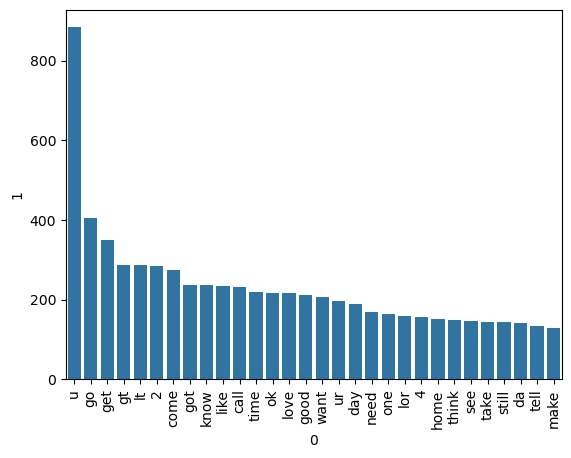

In [86]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


### MODEL BUILDING

In [162]:
# converting text to vector using bag of word technique and tfidf
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [163]:
# X = cv.fit_transform(df['transformed_text']).toarray()


In [164]:
x = tfidf.fit_transform(df['transformed_text']).toarray()



In [165]:
# X.shape

In [166]:
x.shape

(5169, 3000)

In [167]:
y = df['class'].values


In [168]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [169]:
from sklearn.model_selection import train_test_split


In [170]:
# USING COUNT VECTORIZER
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [171]:
# importing Gaussian, Multinomial, Bernoulli Naive Bayes
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [172]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [173]:
# gnb.fit(X_train,y_train)
# y_pred1 = gnb.predict(X_test)
# print(accuracy_score(y_test,y_pred1))
# print(confusion_matrix(y_test,y_pred1))
# print(precision_score(y_test,y_pred1))

In [174]:
# mnb.fit(X_train,y_train)
# y_pred2 = mnb.predict(X_test)
# print(accuracy_score(y_test,y_pred2))
# print(confusion_matrix(y_test,y_pred2))
# print(precision_score(y_test,y_pred2))

In [175]:
# bnb.fit(X_train,y_train)
# y_pred3 = bnb.predict(X_test)
# print(accuracy_score(y_test,y_pred3))
# print(confusion_matrix(y_test,y_pred3))
# print(precision_score(y_test,y_pred3))

In [176]:
# USING TFIDF VECTORIZER
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)



In [177]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [178]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [179]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [180]:
# tfidf 
# mnb

In [181]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))